# Eye gender Classifier

## Importing libraries :

In [1]:
import numpy as np
import pandas as pd
import os
import random
from shutil import copyfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Reading Data (Preprocessing):

In [2]:
data_male_dir = os.path.join('../input/eyes-rtte/maleeyes/')
data_female_dir = os.path.join('../input/eyes-rtte/femaleeyes/')

In [3]:
data_male_names = os.listdir(data_male_dir)
print(data_male_names[:10])

data_female_names = os.listdir(data_female_dir)
print(data_male_names[:10])

['3863.jpg', '623.jpg', '2193.jpg', '3750.jpg', '2008.jpg', '5982.jpg', '2081.jpg', '6588.jpg', '3919.jpg', '6197.jpg']
['3863.jpg', '623.jpg', '2193.jpg', '3750.jpg', '2008.jpg', '5982.jpg', '2081.jpg', '6588.jpg', '3919.jpg', '6197.jpg']


In [4]:
print('total male images:', len(os.listdir(data_male_dir)))
print('total female images:', len(os.listdir(data_female_dir)))

total male images: 6323
total female images: 5202


In [5]:
try:
    os.mkdir("/tmp/train/")
    os.mkdir("/tmp/train/male/")
    os.mkdir("/tmp/train/female/")
    
    os.mkdir("/tmp/test/")
    os.mkdir("/tmp/test/male/")
    os.mkdir("/tmp/test/female/")
except OSError:
    pass

In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


train_male_dir = "/tmp/train/male/"
test_male_dir = "/tmp/test/male/"

train_female_dir = "/tmp/train/female/"
test_female_dir = "/tmp/test/female/"

split_size = 0.9
split_data(data_male_dir, train_male_dir, test_male_dir, split_size)
split_data(data_female_dir, train_female_dir, test_female_dir, split_size)

In [7]:
print(len(os.listdir("/tmp/train/male/")))
print(len(os.listdir("/tmp/test/male/")))
print(len(os.listdir("/tmp/train/female/")))
print(len(os.listdir("/tmp/test/female/")))

5690
633
4681
521


In [8]:
train_male_names = os.listdir(train_male_dir)
print(train_male_names[:10])
train_female_names = os.listdir(train_female_dir)
print(train_female_names[:10])

test_male_names = os.listdir(test_male_dir)
print(test_male_names[:10])
test_female_names = os.listdir(test_female_dir)
print(test_male_names[:10])

['6790.jpg', '4644.jpg', '1835.jpg', '1102.jpg', '6040.jpg', '4423.jpg', '1806.jpg', '4760.jpg', '217.jpg', '5790.jpg']
['4644.jpg', '1835.jpg', '1102.jpg', '6040.jpg', '5790.jpg', '195.jpg', '5352.jpg', '7430.jpg', '3947.jpg', '5662.jpg']
['3274.jpg', '6575.jpg', '2025.jpg', '5625.jpg', '3877.jpg', '6848.jpg', '6656.jpg', '2753.jpg', '3315.jpg', '605.jpg']
['3274.jpg', '6575.jpg', '2025.jpg', '5625.jpg', '3877.jpg', '6848.jpg', '6656.jpg', '2753.jpg', '3315.jpg', '605.jpg']


## Creation of our model :

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
train_dir = "/tmp/train/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

test_dir = "/tmp/test/"
test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  target_size=(150, 150),
                                                  shuffle=False)

Found 10371 images belonging to 2 classes.
Found 1154 images belonging to 2 classes.


In [13]:
model.fit(train_generator, epochs=15, steps_per_epoch=170,
                    validation_data=test_generator, validation_steps=4)

Epoch 1/15
170/170 [==============================] - 62s 358ms/step - loss: 1.1766 - acc: 0.6061 - val_loss: 0.3041 - val_acc: 0.8750
Epoch 2/15
170/170 [==============================] - 60s 356ms/step - loss: 0.4557 - acc: 0.7944 - val_loss: 0.3858 - val_acc: 0.8594
Epoch 3/15
170/170 [==============================] - 61s 361ms/step - loss: 0.3832 - acc: 0.8272 - val_loss: 0.1675 - val_acc: 0.9453
Epoch 4/15
170/170 [==============================] - 61s 360ms/step - loss: 0.3228 - acc: 0.8655 - val_loss: 0.2855 - val_acc: 0.8750
Epoch 5/15
170/170 [==============================] - 60s 356ms/step - loss: 0.2726 - acc: 0.8885 - val_loss: 0.2718 - val_acc: 0.9062
Epoch 6/15
170/170 [==============================] - 61s 358ms/step - loss: 0.2353 - acc: 0.9014 - val_loss: 0.0991 - val_acc: 0.9688
Epoch 7/15
170/170 [==============================] - 60s 353ms/step - loss: 0.2237 - acc: 0.9054 - val_loss: 0.2097 - val_acc: 0.9375
Epoch 8/15
170/170 [==============================] - 6

In [14]:
predictions = model.predict(test_generator)
print(predictions)

[[1.19993114e-04]
 [4.60708952e-06]
 [1.21034072e-09]
 ...
 [9.99999166e-01]
 [1.00000000e+00]
 [1.26660407e-01]]


In [15]:
print(test_generator.class_indices)

{'female': 0, 'male': 1}


## Let's check our model predictions with pics :

In [16]:
def draw_image (image, predictions=predictions, generator=test_generator): 
    try :
        
        if predictions[image]<0.5 :
            pred = 0
        elif predictions[image]>=0.5 :
            pred = 1
    
    
        if pred == 0 :
            pred_gender = 'Female'
            acc = 1 - predictions[image]
        elif pred == 1 :
            pred_gender = 'Male'
            acc = predictions[image]
            
            
        
        
        if generator.labels[image] == pred :
            state = 'True'
        else :
            state = 'Wrong'
        

        img = mpimg.imread(generator.filepaths[image])
        plt.imshow(img)
        plt.xlabel("This Eye is predicted to be (" + pred_gender + ")\n accurcy = " + str(acc)
                       + "\n Prediction is " + state ,size=14 )
        
    except OSError:
        pass

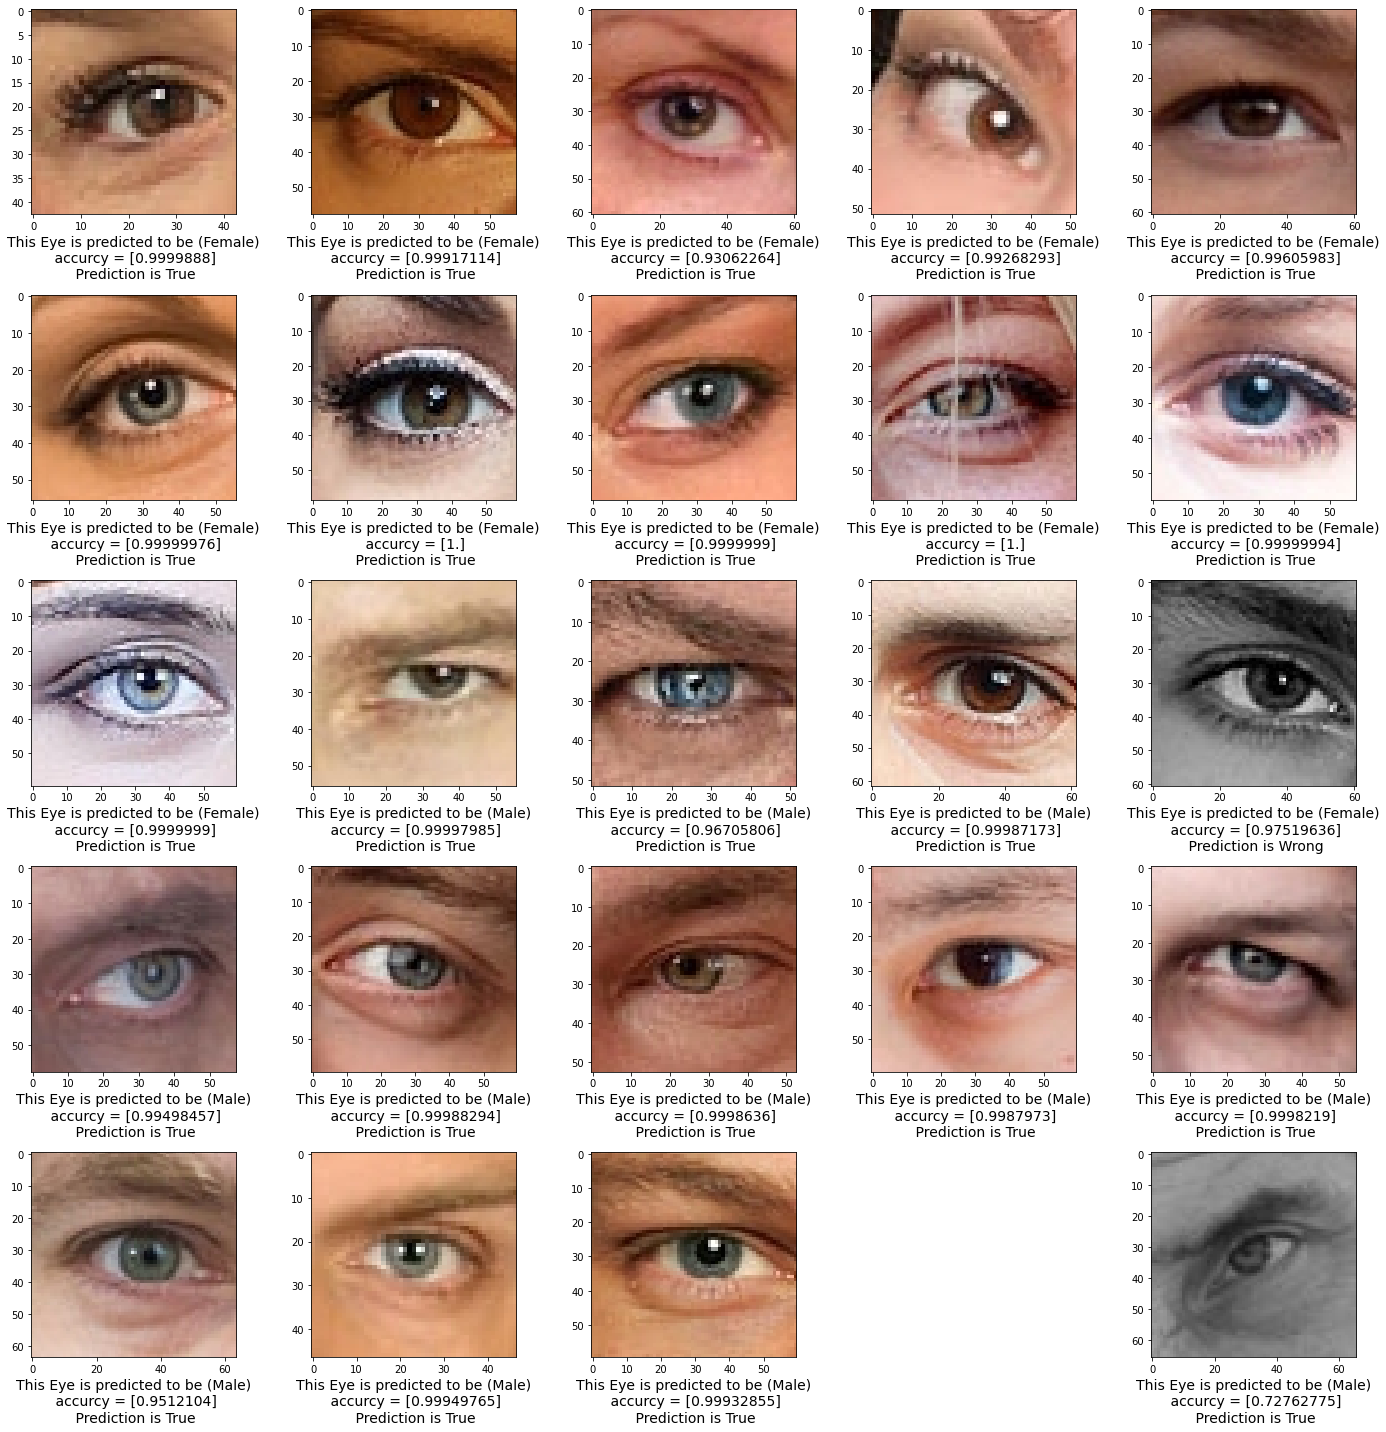

In [17]:
ncols = 5
nrows = 5
pic_index = 510
num_images = nrows*ncols 
splited_image = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
image = pic_index
 
for i in range(num_images):
    
    image = pic_index + i
    
    sp = plt.subplot(nrows, ncols, i+1)
    
    
    draw_image(image)
    
    #image = image + 1
    
    plt.tight_layout()
    
plt.show()

In [18]:
model.evaluate(test_generator)

37/37 [==============================] - 4s 98ms/step - loss: 0.3284 - acc: 0.9090


[0.32840314507484436, 0.9090121388435364]

## Now let's see how much our model succeeded :

In [19]:
result = []

for i in range(len(predictions)) :
    
    
    if predictions[i]<0.5 :
        pred = 0
    elif predictions[i]>=0.5 :
        pred = 1            
        
        
    if test_generator.labels[i] == pred :
        state = 'True'
    else :
        state = 'Wrong'
        
    result.append(state)

In [20]:
result_df = pd.DataFrame(result, columns=['result'])
result_df

,result
0,True
1,True
2,True
3,True
4,True
...,...
1149,True
1150,True
1151,True
1152,True


In [21]:
print("The model results are : " + str((result_df.value_counts()/len(result_df))*100))

The model results are : result
True      90.901213
Wrong      9.098787
dtype: float64


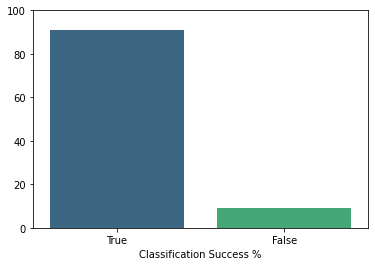

In [22]:
import seaborn as sb

sb.barplot(y=(result_df.value_counts().values/len(result_df))*100,
           x=['True','False'], palette='viridis')
plt.xlabel('Classification Success %')
plt.yticks(range(0,101,20))
plt.show()